In [27]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
data = pd.read_csv('HR.csv', error_bad_lines=False)
data.head(20)

C:\Users\Павел\AppData\Local\Temp\ipykernel_6900\4000627108.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('HR.csv', error_bad_lines=False)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


# Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [7]:
statistics = data.describe().transpose()

# Добавим моду так как ее нету в методе describe
statistics['Мода'] = data.mode().iloc[0]

statistics = statistics.rename(columns={
    'mean': 'Среднее',
    '50%': 'Медиана',
    'min': 'Минимум',
    'max': 'Максимум',
    'std': 'Стандартное отклонение',
})

print(statistics)

                         count     Среднее  Стандартное отклонение  Минимум  \
satisfaction_level     14999.0    0.612834                0.248631     0.09   
last_evaluation        14999.0    0.716102                0.171169     0.36   
number_project         14999.0    3.803054                1.232592     2.00   
average_montly_hours   14999.0  201.050337               49.943099    96.00   
time_spend_company     14999.0    3.498233                1.460136     2.00   
Work_accident          14999.0    0.144610                0.351719     0.00   
left                   14999.0    0.238083                0.425924     0.00   
promotion_last_5years  14999.0    0.021268                0.144281     0.00   

                          25%  Медиана     75%  Максимум  Мода  
satisfaction_level       0.44     0.64    0.82       1.0   0.1  
last_evaluation          0.56     0.72    0.87       1.0  0.55  
number_project           3.00     4.00    5.00       7.0   4.0  
average_montly_hours   156.0

# Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

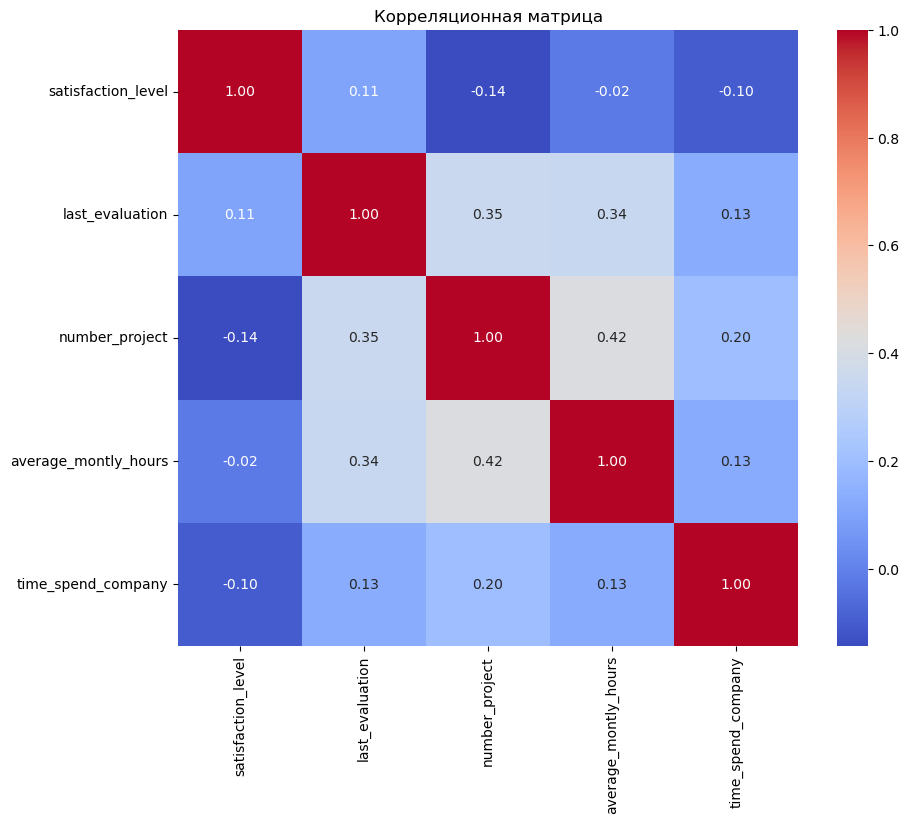

In [9]:
quantitative_df = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]
correlation_matrix = quantitative_df.corr()
correlation_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

number_project и average_montly_hours имеет самый большой коэффициент корреляции 0.42. 
На втором месте number_project и last_evaluation с коэффициентом корреляции 0.35
Две наименее скоррелированные переменные: 
satisfaction_level с number_project имеют коэффициент корреляции -0.14
satisfaction_level с average_monthly_hours имеют коэффициент корреляции -0.02

# Рассчитайте сколько сотрудников работает в каждом департаменте.

In [10]:
employee_count_by_department = data['department'].value_counts()
print(employee_count_by_department)

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


# Показать распределение сотрудников по зарплатам. 

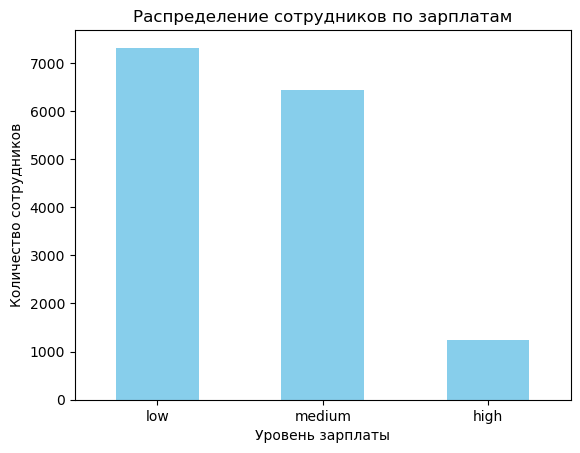

In [14]:
salary_distribution = data['salary'].value_counts()
salary_distribution.plot(kind='bar', color='skyblue')
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.xticks(rotation=0) 
plt.show()

# Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

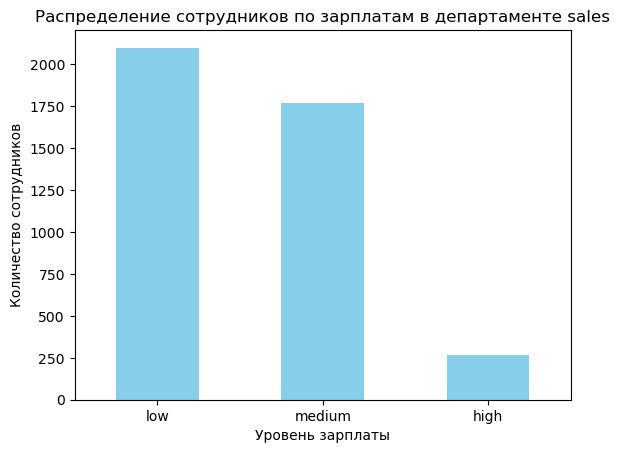

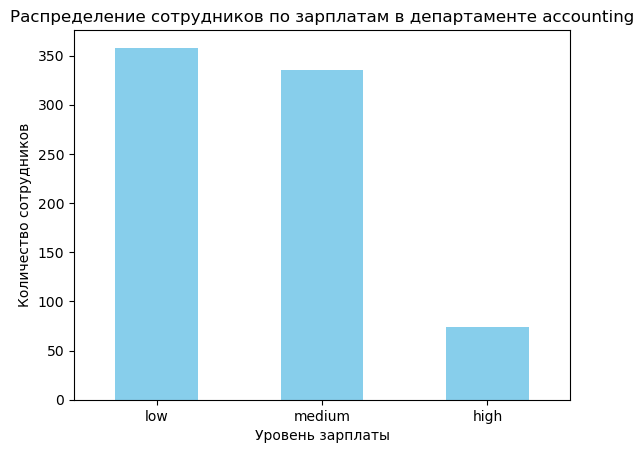

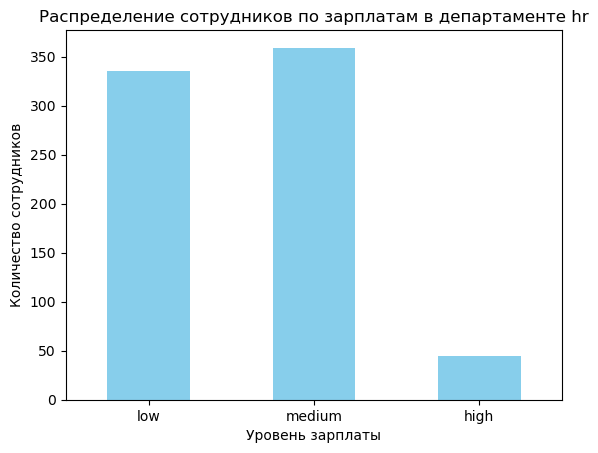

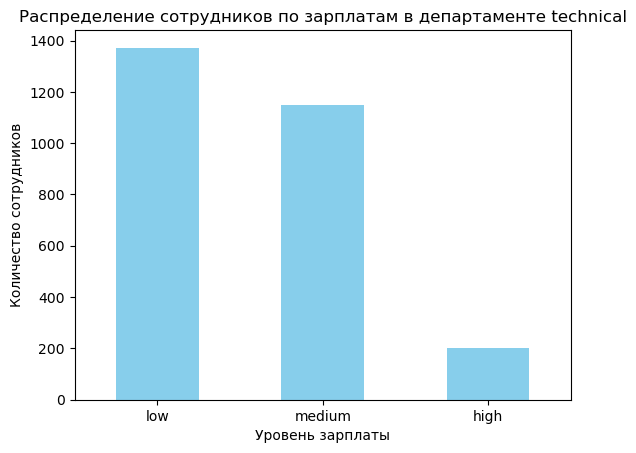

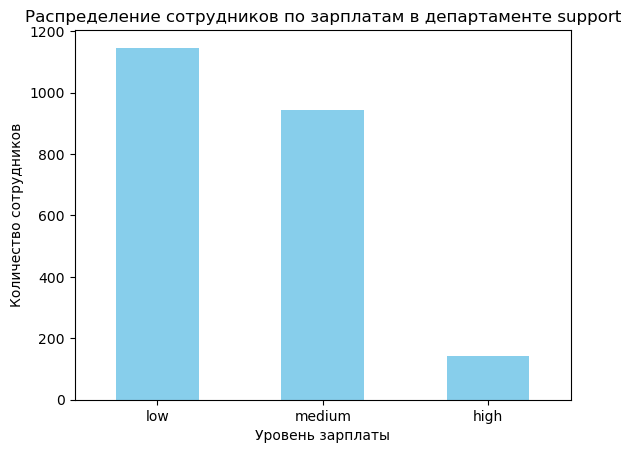

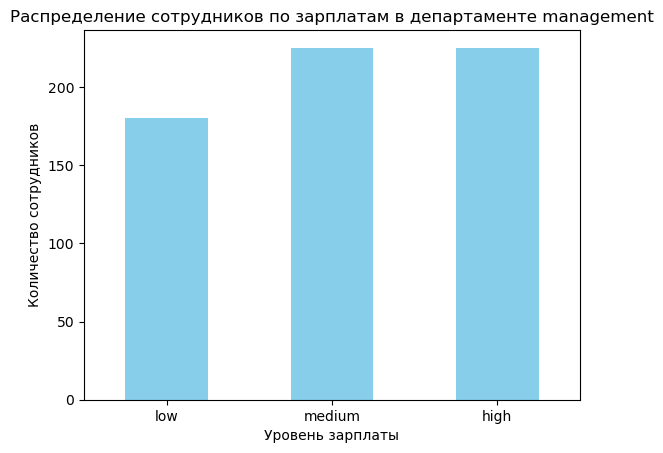

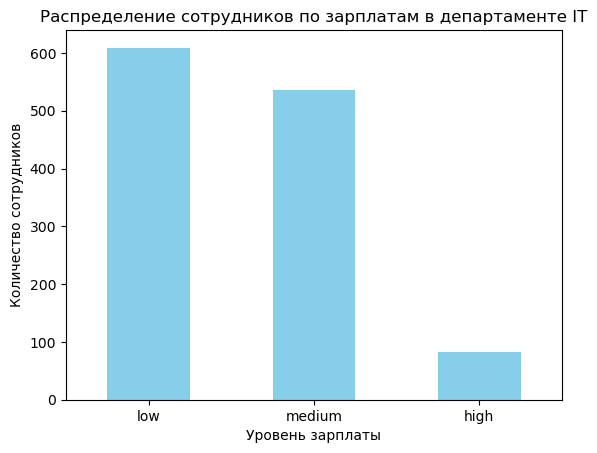

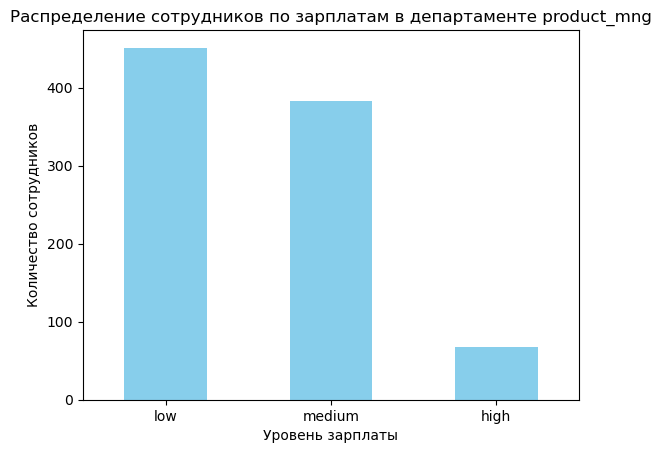

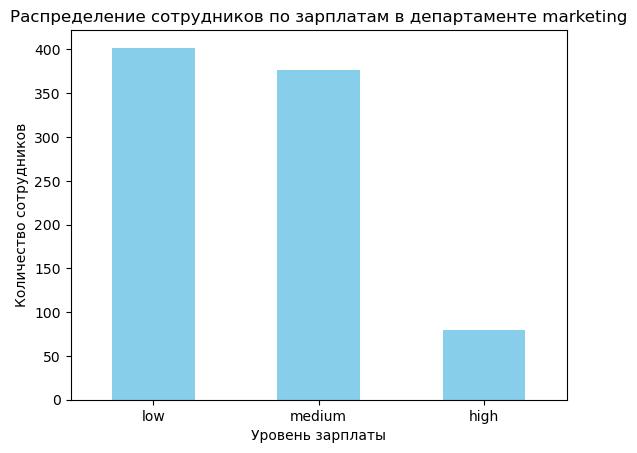

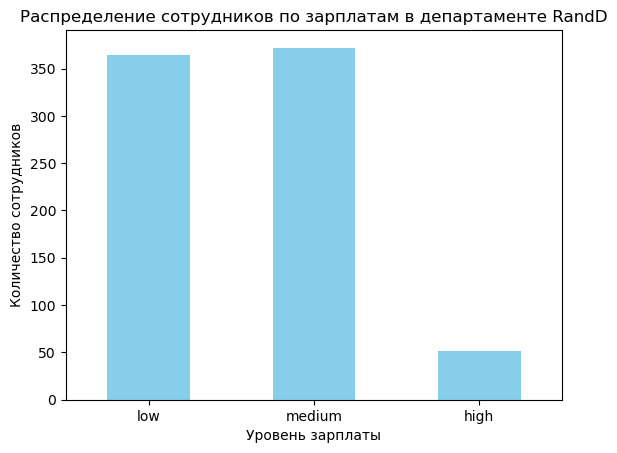

In [16]:
salary_order = ['low', 'medium', 'high'] # добавил чтобы не было путаницы в порядке зарплат.
for department in data['department'].unique():
    department_data = data[data['department'] == department]
    salary_distribution = department_data['salary'].value_counts().loc[salary_order]
    salary_distribution.plot(kind='bar', color='skyblue')
    plt.title(f'Распределение сотрудников по зарплатам в департаменте {department}')
    plt.xlabel('Уровень зарплаты')
    plt.ylabel('Количество сотрудников')
    plt.xticks(rotation=0)
    plt.show()

# Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [18]:
high_salary = data[data['salary'] == 'high']['average_montly_hours']
low_salary = data[data['salary'] == 'low']['average_montly_hours']
# Расчитаем t-тест с equal_var=True
t_statistic_equal_var = stats.ttest_ind(high_salary, low_salary, equal_var=True)

# Расчитаем t-тест с equal_var=False
t_statistic_unequal_var = stats.ttest_ind(high_salary, low_salary, equal_var=False)

#Результаты обоих тестов
print("Сравнение t-тестов:")
print(f"t-статистика (equal_var=True): {t_statistic_equal_var.statistic}")
print(f"p-значение (equal_var=True): {t_statistic_equal_var.pvalue}")
print(f"t-статистика (equal_var=False): {t_statistic_unequal_var.statistic}")
print(f"p-значение (equal_var=False): {t_statistic_unequal_var.pvalue}")
#Из этого следует что разница между t-тестами не существенная, поэтому оставляем equal_var=True.
if t_statistic_equal_var.pvalue < 0.05:
    print("Отвергаем нулевую гипотезу: Сотрудники с высоким окладом проводят на работе больше времени.")
else:
    print("Не отвергаем нулевую гипотезу: Нет статистически значимой разницы во времени, проведенном на работе, между сотрудниками с высоким и низким окладом.")

Сравнение t-тестов:
t-статистика (equal_var=True): -0.7288680398062308
p-значение (equal_var=True): 0.4661023478267259
t-статистика (equal_var=False): -0.7624331665385475
p-значение (equal_var=False): 0.4459045542257889
Не отвергаем нулевую гипотезу: Нет статистически значимой разницы во времени, проведенном на работе, между сотрудниками с высоким и низким окладом.


# Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

In [26]:
left = data[data['left'] == 1]  # Уволившиеся
not_left = data[data['left'] == 0]  # Неуволившиеся
#Думаю правильным решением будет проверить выбросы в нужных нам категориях
Q1 = data['satisfaction_level'].quantile(0.25)
Q3 = data['satisfaction_level'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_satisfaction_level = data[(data['satisfaction_level'] < lower_bound) | (data['satisfaction_level'] > upper_bound)]
print("Выбросы для satisfaction_level:")
print(outliers_satisfaction_level)

Q1 = data['number_project'].quantile(0.25)
Q3 = data['number_project'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_number_project = data[(data['number_project'] < lower_bound) | (data['number_project'] > upper_bound)]
print("Выбросы для number_project:")
print(outliers_number_project)
#Делаем вывод, выбросов в данных категориях нет!
promotion_left = left['promotion_last_5years'].mean()
promotion_not_left = not_left['promotion_last_5years'].mean()
satisfaction_left = left['satisfaction_level'].mean()
satisfaction_not_left = not_left['satisfaction_level'].mean()
projects_left = left['number_project'].mean()
projects_not_left = not_left['number_project'].mean()
print("Доля сотрудников с повышением за последние 5 лет среди уволившихся:", promotion_left)
print("Доля сотрудников с повышением за последние 5 лет среди неуволившихся:", promotion_not_left)

print("\nСредняя степень удовлетворенности среди уволившихся:", satisfaction_left)
print("Средняя степень удовлетворенности среди неуволившихся:", satisfaction_not_left)

print("\nСреднее количество проектов среди уволившихся:", projects_left)
print("Среднее количество проектов среди неуволившихся:", projects_not_left)

Выбросы для satisfaction_level:
Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, left, promotion_last_5years, department, salary]
Index: []
Выбросы для number_project:
Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, left, promotion_last_5years, department, salary]
Index: []
Доля сотрудников с повышением за последние 5 лет среди уволившихся: 0.005320638476617194
Доля сотрудников с повышением за последние 5 лет среди неуволившихся: 0.026251312565628283

Средняя степень удовлетворенности среди уволившихся: 0.4400980117614114
Средняя степень удовлетворенности среди неуволившихся: 0.666809590479524

Среднее количество проектов среди уволившихся: 3.8555026603192384
Среднее количество проектов среди неуволившихся: 3.786664333216661


# Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки

In [28]:
data = data.drop(['department', 'salary'], axis=1)
X = data.drop('left', axis=1)
y = data['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Точность модели: {:.2f}%".format(accuracy * 100))
print("Матрица ошибок:")
print(confusion)
print("Отчет о классификации:")
print(report)

Точность модели: 75.33%
Матрица ошибок:
[[2094  200]
 [ 540  166]]
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2294
           1       0.45      0.24      0.31       706

    accuracy                           0.75      3000
   macro avg       0.62      0.57      0.58      3000
weighted avg       0.71      0.75      0.72      3000



Модель достаточно точно предсказывает неуволившихся сотрудников (класс 0), но менее точно предсказывает уволившихся сотрудников (класс 1). В целом у модели возникают проблемы именно с точностью предсказывания уволившихся сотрудников. Также сильно бросается в глаза очень низкий процент полноты для класса уволившихся (24%). Это означает что 76% процентов уволившихся были неправильно классифицированы моделью.